### Análise Exploratória

In [374]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()
from pandas_profiling import ProfileReport

train_df = pd.read_csv('train.csv')

In [375]:
display(train_df)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [376]:
profile = ProfileReport(train_df)

In [377]:
profile.to_file("TitanicCaseProfile.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 66.67it/s]


In [378]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [379]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We can see that the age column contains a lot of null values, as does the one about Cabins. Since we can see in our profiling that Cabin Number has a high cardinality and its correlation with survival rates can be better understood through the Passenger Class information, those null values don't have as much of an impact. However, we will examine why there are so many null values in the age information, and see how we can treat them.
From a quick research in the web, we can see that there were not 177 babies under the age of one year onboard, and as such we know this is not an error in the Data Type, but actually a lack of information.

In [380]:
w = train_df.loc[train_df['Age'].isnull()]
w

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [381]:
#counting how many of the passengers with null values as their age survived
u = len(w.loc[w['Survived']==1])
print("Survived:", u)
#counting how many of the passengers with null values as their age did not survive
v = len(w.loc[w['Survived']==0])
print("Did not survive:", v)


Survived: 52
Did not survive: 125


Analyzing the data, we can see most of the passengers with null values as their age did not survive. As such, we can treat the data by separating the data frame into survivors and non survivors and interpolating the ages for each of these groups. After that is done, we can deal with the null values in the 'Embarked' column. As for the 'Cabin' column, since more than half of its data is missing, and the remainder has high cardinality, we will simply delete it.

In [382]:
train_df = train_df.drop(columns = ['Cabin'], axis = 1)

#train_df = train_df.interpolate()
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [383]:
#First, we separate the dataframe in survivors and non survivors
from pandas import concat


df_surv = train_df.loc[train_df['Survived']==1]
df_dead = train_df.loc[train_df['Survived']==0]
#Now, we can interpolate and replace the age null values in each of the dataframes

df_surv = df_surv.interpolate()
df_dead = df_dead.interpolate()

#Lastly, we glue the two dataframes back into one
train_df = pd.concat([df_surv,df_dead])

#And drop the two rows of null 'Embarked' values
train_df = train_df.dropna(axis=0, how = "any")
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

We have now dealt with the null values, and can move forward with the exploratory analysis. 

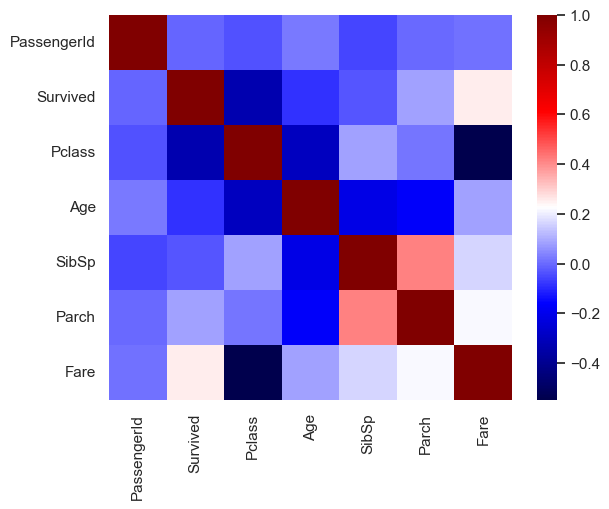

In [384]:
train_df_num = train_df[['Age','SibSp','Parch','Fare']]
train_df_cat = train_df[['Survived','Pclass','Sex','Embarked']]
#separating into numerical and categorical variables
figuraa = plt.figure(figsize=(6.5,5))
ax = sns.heatmap(train_df.corr(), cmap="seismic")
plt.show()
#heatmap to analyze correlations

In [385]:
train_df_surv_num =  train_df_num.loc[train_df['Survived']==1]
train_df_dead_num =  train_df_num.loc[train_df['Survived']==0]
train_df_surv_cat =  train_df_cat.loc[train_df['Survived']==1]
train_df_dead_cat =  train_df_cat.loc[train_df['Survived']==0]

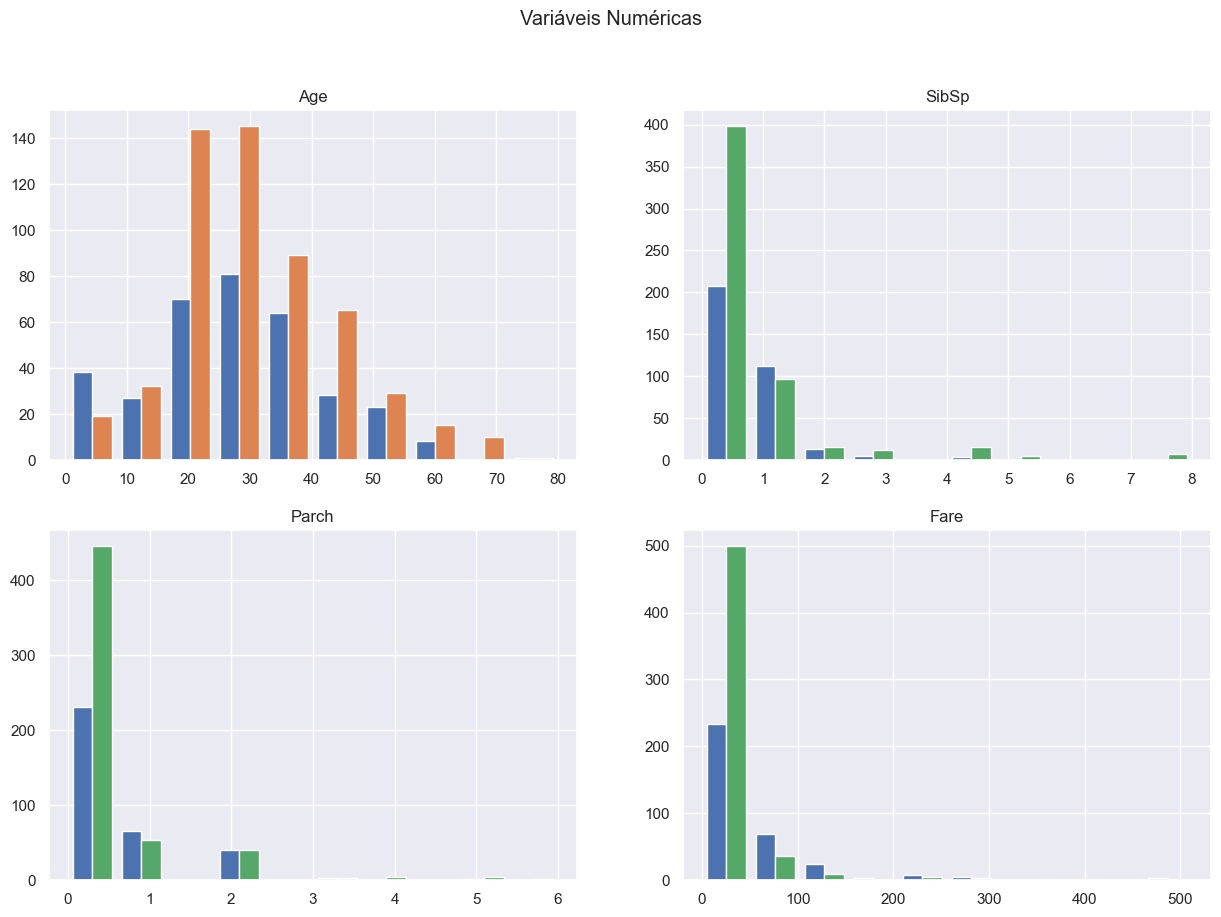

In [386]:
train_df_num = train_df[['Age','SibSp','Parch','Fare']]
## train_df_cat = train_df[['Survived','Pclass','Sex','Embarked']]
figurac = plt.figure(figsize=(15,10))
figurac.suptitle('Variáveis Numéricas')

i=1
j = 220 + i

for column in train_df_num:
    x = train_df_surv_num[column]
    y = train_df_dead_num[column] 
    figurac.add_subplot(j)
    plt.style.use('seaborn-deep')
    plt.title(column)
    plt.hist([x, y], label=['x', 'y'])
    i = i + 1
    j = 220 + i

plt.show()

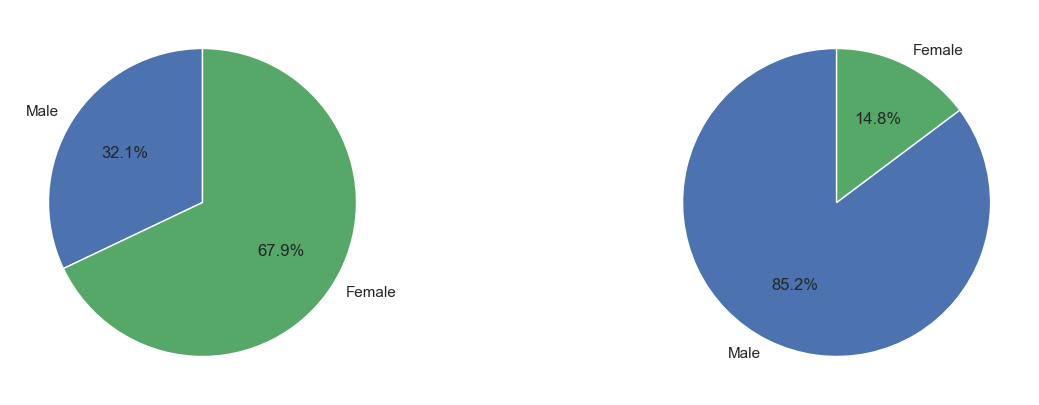

In [387]:
figura = plt.figure(figsize=(15,5))

labels = ['Male', 'Female']
len(train_df_surv_cat.loc[train_df_surv_cat['Sex']=='male'])
train_df_dead_cat.loc[train_df_dead_cat['Sex']=='male']
sizes_dead = [len(train_df_dead_cat.loc[train_df_dead_cat['Sex']=='male']), len(train_df_dead_cat.loc[train_df_dead_cat['Sex']=='female'])]
sizes_surv = [len(train_df_surv_cat.loc[train_df_surv_cat['Sex']=='male']), len(train_df_surv_cat.loc[train_df_surv_cat['Sex']=='female'])]
figura.add_subplot(1,2,1).pie(sizes_surv, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90)
figura.add_subplot(1,2,2).pie(sizes_dead, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90)
plt.show(figura)

### Aqui começamos a parte de Machine Learning

In [388]:
train_df = train_df.drop('Name', axis = 1)
train_df = train_df.drop('Ticket', axis = 1)
train_df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
8,9,1,3,female,27.0,0,2,11.1333,S
9,10,1,2,female,14.0,1,0,30.0708,C
...,...,...,...,...,...,...,...,...,...
884,885,0,3,male,25.0,0,0,7.0500,S
885,886,0,3,female,39.0,0,5,29.1250,Q
886,887,0,2,male,27.0,0,0,13.0000,S
888,889,0,3,female,29.5,1,2,23.4500,S


In [389]:
Y = train_df['Survived']
X = train_df.drop('Survived', axis = 1) 

In [390]:
from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()
regression_model.fit(X,Y)

ValueError: could not convert string to float: 'female'